In [59]:
import base64
import io
from PIL import Image

In [60]:
with open('sample_images/dog_with_ball.jpeg', 'rb') as image_file:
    base64str = base64.b64encode(image_file.read()).decode('utf-8')
    
print(base64str)

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFRUXGBUVGBYXFxUXFxYVFRUWFxUVFRUYHSggGB0lHRcVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0lHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0rLf/AABEIALwBDAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAgMEBgcBAAj/xAA8EAABAwIEAwYEBAUDBQEAAAABAAIRAyEEBRIxQVFhBhMicYGRMqGxwQdCUvAUM2LR8SOCkhUWcqLhQ//EABoBAAIDAQEAAAAAAAAAAAAAAAIDAAEEBQb/xAAsEQACAgICAQMDAgcBAAAAAAAAAQIRAyESMQQTQVEFImEykRQVcYGhscFC/9oADAMBAAIRAxEAPwDP8JrdYkovhcPFzdcyMatMQAYCtWPwlMUybAgLjSg5fgRCFopuZs5e6HUKBcY5ovXrti8Ih2SpU9etwBgwOiuF9FqNugZUwj6bZLbIBiLlaX2ir02tIEXErOMQwudLRCZiSjJhcEmN0aAuUUyqtTZAPEyUHxDC2bpvCVDNytNasvo0RuApVBO4Q85HB6c0Lwmemm0NF0ay3OwWwT/lKk7C5JkGrQFMwfdGslzGn8JVdzbFh5JGyZwJSpa2DdMs+bVGOvEAEX5qy4Q0hSFmkaenJUh7gRcyhOMxjvhBMclcM26RbmS88rN1uDTxKLdmso77TaVXcHQEcyN+Mea0b8OqjGkjifspGKc9gpWw1hezhENJtxHNP1cmZQYXhtxf33R7G4gNbqG4uqb2r7UNNJ7A8aiC0AEWK0zccasPS2VzMsYKmIawkC8R/SBK0Hs3jmMGmQIsOqwx+HqF0tJLuB4yrlkeTY17T358FiADBnmShxZW9oJbRr2Z5o1rCbbKNkmc0ntkOBlUGnkmIk6q

In [61]:
def base64str_to_PILImage(base64str):
    base64_img_bytes = base64str.encode('utf-8')
    base64bytes = base64.b64decode(base64_img_bytes)
    bytesObj = io.BytesIO(base64bytes)
    img = Image.open(bytesObj)
    return img

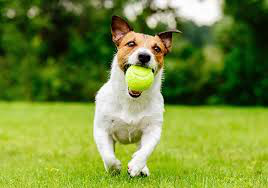

In [62]:
base64str_to_PILImage(base64str)

## Part 2: Local check of FastAPI code

In [63]:
import requests,json
payload = json.dumps({
  "base64str": base64str,
  "threshold": 0.5
})
response = requests.put("http://127.0.0.1:8000/predict",data = payload)
data_dict = response.json()

In [64]:
# Look into why the number of predicted boxes and num of classes don't match up
data_dict

{'boxes': [[[86.6391830444336, 17.845340728759766],
   [174.60049438476562, 178.18980407714844]],
  [[126.230712890625, 64.86167907714844],
   [153.49273681640625, 96.09326934814453]]],
 'classes': ['dog', 'sports ball']}

## Visualize

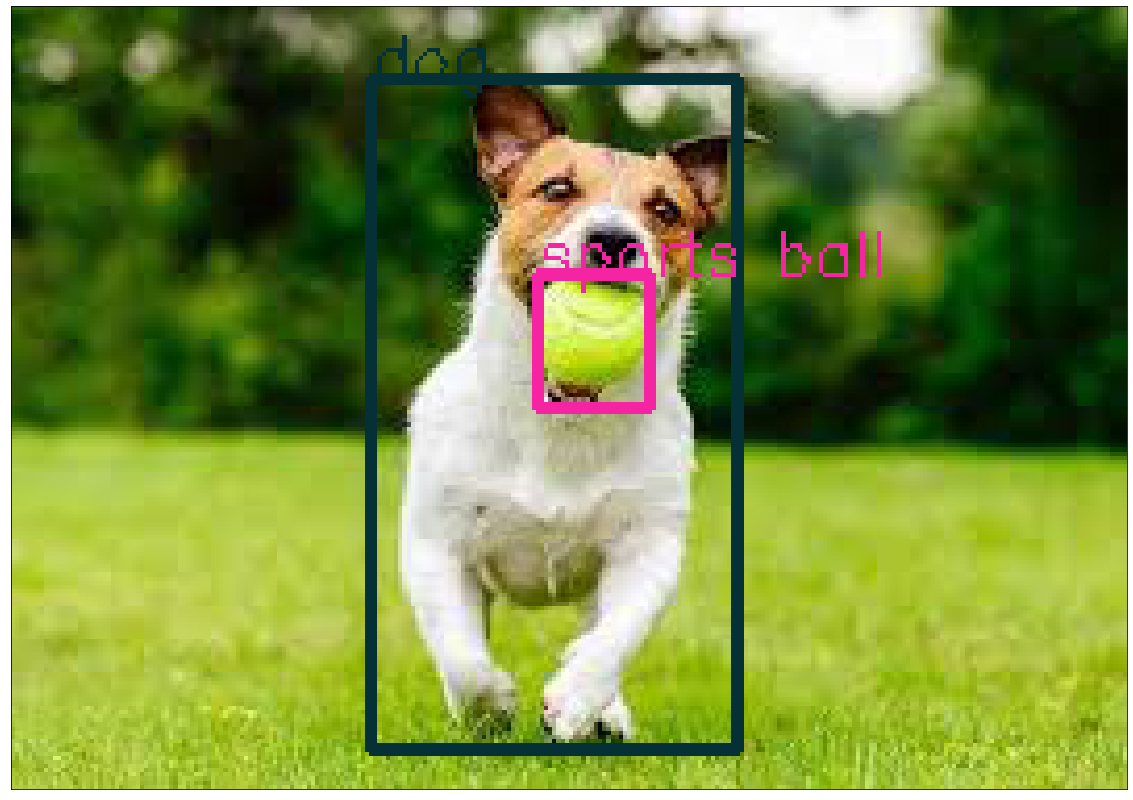

In [65]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def PILImage_to_cv2(img):
    return np.asarray(img)

def drawboundingbox(img, boxes, pred_cls, rect_th=2, text_size=0.5, text_th=1):
    img = PILImage_to_cv2(img)
    class_color_dict = {}
    
    #initialize some random colors for each class for better looking bounding boxes
    for cat in pred_cls:
        class_color_dict[cat] = [random.randint(0, 255) for _ in range(3)]
    
    for i in range(len(boxes)):
        cv2.rectangle(img, (int(boxes[i][0][0]), int(boxes[i][0][1])),
                      (int(boxes[i][1][0]),int(boxes[i][1][1])),
                      color=class_color_dict[pred_cls[i]], thickness=rect_th)
        cv2.putText(img,pred_cls[i], (int(boxes[i][0][0]), int(boxes[i][0][1])),  cv2.FONT_HERSHEY_SIMPLEX, text_size, class_color_dict[pred_cls[i]],thickness=text_th) # Write the prediction class
    plt.figure(figsize=(20,30))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
img = Image.open("sample_images/dog_with_ball.jpeg")
drawboundingbox(img, data_dict['boxes'], data_dict['classes'])

In [66]:
# This is hitting Docker endpoint
payload = json.dumps({
  "base64str": base64str,
  "threshold": 0.5
})
# response = requests.put("http://18.237.28.174/predict",data = payload)
response = requests.put("http://0.0.0.0/predict", data = payload)
data_dict = response.json()
print(data_dict)

{'boxes': [[[86.63919830322266, 17.845348358154297], [174.6005096435547, 178.18980407714844]], [[126.230712890625, 64.86167907714844], [153.49273681640625, 96.09326934814453]]], 'classes': 'frisbee'}
